In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [3]:
train = pd.read_csv('winequality.csv')

In [4]:
train.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
236,white,7.2,0.230,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.000000,6
6252,red,7.2,0.580,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.000000,5
5028,red,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.400000,5
2147,white,6.4,0.290,0.20,15.6,0.040,20.0,142.0,0.99620,3.10,0.54,10.600000,5
4372,white,7.1,0.230,0.23,3.5,0.038,23.0,112.0,0.99157,3.05,0.37,11.366667,6
712,white,8.2,0.270,0.43,1.6,0.035,31.0,128.0,0.99160,3.10,0.50,12.300000,6
4967,red,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.500000,6
3978,white,6.5,0.290,0.53,1.7,0.040,41.0,192.0,0.99220,3.26,0.59,10.400000,7
3857,white,5.4,0.170,0.27,2.7,0.049,28.0,104.0,0.99224,3.46,0.55,10.300000,6
1439,white,6.1,0.250,0.49,7.6,0.052,67.0,226.0,0.99560,3.16,0.47,8.900000,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
train.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Data Cleaning

In [7]:
train = train.drop('free sulfur dioxide', axis = 1)

In [8]:
train.shape

(6497, 12)

In [9]:
train.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
(train.isna().sum()/train.shape[0])*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [11]:
train['fixed acidity'] = train['fixed acidity'].fillna(train['fixed acidity'].mode()[0])

Converting wine types into binary form to perform Logistic Regression 

In [12]:
train.type.replace(to_replace=['white', 'red'], value=[1, 0])

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [13]:
train['volatile acidity'] = train['volatile acidity'].fillna(train['volatile acidity'].mean())

In [14]:
train['citric acid'] = train['citric acid'].fillna(train['citric acid'].mean())

In [15]:
train['residual sugar'] = train['residual sugar'].fillna(train['residual sugar'].mode()[0])

In [16]:
train['chlorides'] = train['chlorides'].fillna(train['chlorides'].mean())

In [17]:
train['citric acid'] = train['citric acid'].fillna(train['citric acid'].mean())

In [18]:
train['pH'] = train['pH'].fillna(train['pH'].mode()[0])

In [19]:
train['sulphates'] = train['sulphates'].fillna(train['sulphates'].mean())

In [20]:
train.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

EDA

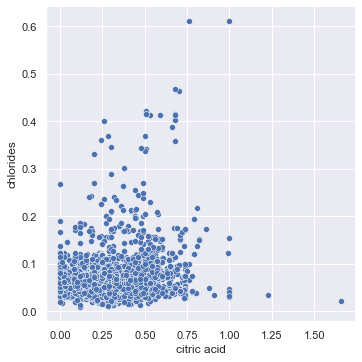

In [21]:
sns.relplot(x = 'citric acid', y = 'chlorides', data = train)

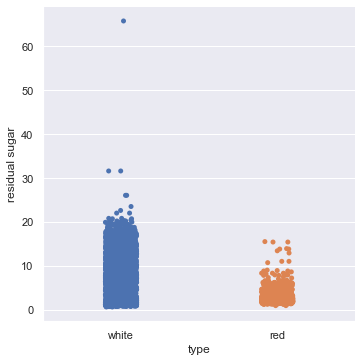

In [22]:
sns.catplot(x = 'type', y = 'residual sugar', data = train)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

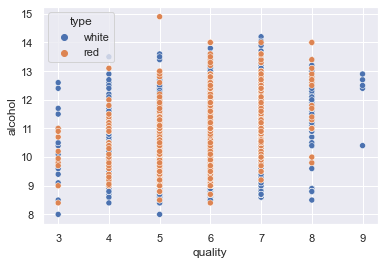

In [23]:
sns.scatterplot(x = 'quality', y = 'alcohol', hue = 'type', data = train)

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

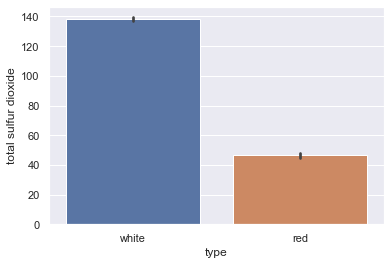

In [24]:
sns.barplot(x = "type", y= "total sulfur dioxide", data = train)

Logistic Regression model

In [25]:
train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
lrmodel = train[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','alcohol','quality']]

In [27]:
final_lrmodel = pd.get_dummies(data=lrmodel, drop_first=True)

In [28]:
final_lrmodel.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_white'],
      dtype='object')

In [34]:
X = final_lrmodel[['fixed acidity', 'citric acid', 'residual sugar','chlorides', 'pH', 'sulphates', 'alcohol','quality']]
y = final_lrmodel['type_white']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
lr = LogisticRegression(random_state=0)

In [37]:
lr.fit(X_train, y_train)

C:\Users\Dell\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [40]:
lr.score(X_train, y_train)

0.9455455070232827

In [41]:
lr.score(X_test, y_test)

0.9461538461538461

Logistic Regression Curve

<AxesSubplot:xlabel='chlorides', ylabel='type_white'>

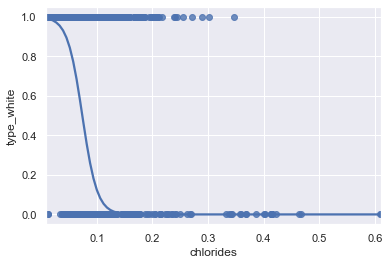

In [42]:
sns.regplot(x='chlorides', y=y, data=final_lrmodel, logistic=True, ci=None)

https://www.statology.org/plot-logistic-regression-in-python/

Evaluation metrics

a) Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[268  46]
 [ 24 962]]


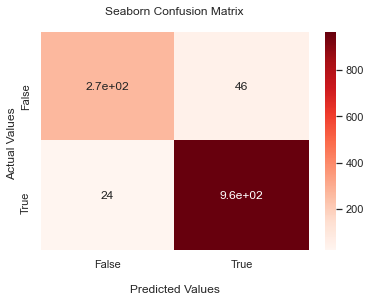

In [45]:
cm = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

cm.set_title('Seaborn Confusion Matrix\n');
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values ');

cm.xaxis.set_ticklabels(['False','True'])
cm.yaxis.set_ticklabels(['False','True'])

plt.show()

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

b) Precision

In [46]:
Precision = precision_score(y_test, y_pred)
print('Precision:', Precision)

Precision: 0.9543650793650794


c) Recall

In [47]:
Recall = recall_score(y_test, y_pred)
print('Recall: ', Recall)

Recall:  0.9756592292089249


d) F1 Score

In [48]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score: {:0.3f}".format(f1))

F1 Score: 0.965


e) Sensitivity

Sensitivity is the proportion of true positives that are correctly predicted by the model (Same as Recall)

f) Specificity

In [49]:
tn = 7
fp = 28

In [50]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.20


https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

g) Misclassification rate

In [51]:
fn = 32
total = 115

In [52]:
MR = (fn+fp)/total
print("Misclassification Rate {:0.3f}".format(MR))

Misclassification Rate 0.522


h) ROC, AUROC

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=4)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

C:\Users\Dell\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9789150010981772 0.9544127336856112


https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/